In [2]:
import numpy as np
import cv2
import sys
import matplotlib.pyplot as plt
from pathlib import Path

folder = "../fig"


In [4]:
src = cv2.imread(Path(folder, "blue_eyes.png"), cv2.IMREAD_REDUCED_COLOR_2)

kernel_3 = np.ones((3, 3), dtype=np.float64)/9.
dst_kernel = cv2.filter2D(src, -1, kernel_3)
dst_blur = cv2.blur(src, (3, 3))

print(kernel_3)

cv2.imshow('src', src)
cv2.imshow('dst_kernel', dst_kernel)
cv2.imshow("dst_blur", dst_blur)

cv2.waitKey()
cv2.destroyAllWindows()

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [8]:
src = cv2.imread(Path(folder, "blue_eyes.png"), cv2.IMREAD_REDUCED_COLOR_2)
cv2.imshow("src", src)

for ksize in (3, 5, 7, 9, 12, 15, 23, 35, 49, 63, 100, 150):
    dst = cv2.blur(src, (ksize, ksize))
    text = '{} x {}'.format(ksize, ksize)
    cv2.putText(dst, text, (20, 30), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 2, cv2.LINE_AA)

    cv2.imshow('mean filter', dst)
    cv2.waitKey()

cv2.destroyAllWindows()

In [9]:
src = cv2.imread(Path(folder, "blue_eyes.png"), cv2.IMREAD_COLOR)

dst_Gaussian1 = cv2.GaussianBlur(src, (0, 0), 1)
dst_mean = cv2.blur(src, (5,5))

cv2.imshow('src', src)
cv2.imshow("Gaussian1", dst_Gaussian1)
cv2.imshow("dst_mean", dst_mean)

cv2.waitKey()
cv2.destroyAllWindows()

In [10]:
src = cv2.imread(Path(folder, "blue_eyes.png"), cv2.IMREAD_REDUCED_COLOR_2)

blr = cv2.GaussianBlur(src, (0,0), 1)
blr2 = cv2.GaussianBlur(src, (0,0), 2)
blr3 = cv2.GaussianBlur(src, (0,0), 3)

dst = cv2.addWeighted(src, 2, blr, -1, 0.0)
dst2 = cv2.addWeighted(src, 2, blr2, -1, 0.0)
dst3 = cv2.addWeighted(src, 2, blr3, -1, 0.0)

cv2.imshow('src', src)
cv2.imshow("blr", blr)
cv2.imshow("sharpening1", dst)
cv2.imshow("sharpening2", dst2)
cv2.imshow("sharpening3", dst3)

cv2.waitKey()
cv2.destroyAllWindows()

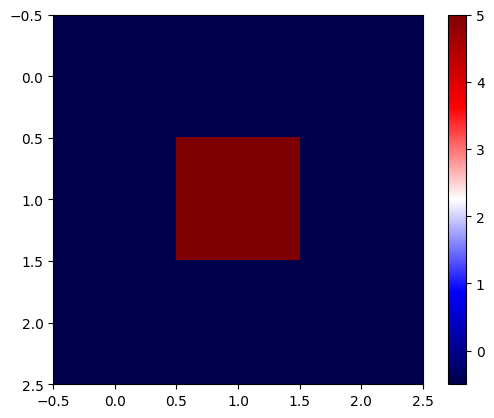

[[-0.5 -0.5 -0.5]
 [-0.5  5.  -0.5]
 [-0.5 -0.5 -0.5]]


In [11]:
src = cv2.imread(Path(folder, "blue_eyes.png"))

kernel_3 = np.ones((3,3), dtype=np.float64)*-.5
kernel_3[1, 1] = 5

dst_kernel = cv2.filter2D(src, -1, kernel_3)

cv2.imshow('src', src)
cv2.imshow('dst_kernel', dst_kernel)

plt.imshow(kernel_3, cmap='seismic')
plt.colorbar()
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

print(kernel_3)

In [13]:
src = cv2.imread(Path(folder, "blue_eyes.png"), cv2.IMREAD_GRAYSCALE)

salt_noise = np.random.choice((0, 255), src.shape, p=(0.99, 0.01)).astype(np.uint8)
pepper_noise = np.random.choice((0, 255), src.shape, p=(0.99, 0.01)).astype(np.uint8)
dst = cv2.add(src, salt_noise)
dst = cv2.subtract(dst, pepper_noise)

dst_median = cv2.medianBlur(dst, 3)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('dst_median', dst_median)

while True:
    if cv2.waitKey() == ord("q"):
        break
    
cv2.destroyAllWindows()

In [14]:
src = cv2.imread(Path(folder, "blue_eyes.png"), cv2.IMREAD_GRAYSCALE)

dst_Gaussian = cv2.GaussianBlur(src, (0,0), 1.)
dst_Bilateral_5 = cv2.bilateralFilter(src, -1, 5, 10)
dst_Bilateral_20 = cv2.bilateralFilter(src, -1, 20, 10)

cv2.imshow('src', src)
cv2.imshow('dst_Gaussian', dst_Gaussian)
cv2.imshow('dst_Bilateral_5', dst_Bilateral_5)
cv2.imshow('dst_Bilateral_20', dst_Bilateral_20)

cv2.waitKey()
cv2.destroyAllWindows()

In [15]:
src1 = np.zeros((256, 256), np.uint8)
cv2.rectangle(src1, (10, 10), (127, 245), 255, -1)
src2 = np.zeros((256, 256), np.uint8)
cv2.circle(src2, (127, 127), 100, 128, -1)

dst1 = cv2.bitwise_and(src1, src2)
dst2 = cv2.bitwise_or(src1, src2)
dst3 = cv2.bitwise_xor(src1, src2)
dst4 = cv2.bitwise_not(src2)

cv2.imshow('src1', src1)
cv2.imshow('src2', src2)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.imshow('dst3', dst3)
cv2.imshow('dst4', dst4)

cv2.waitKey()
cv2.destroyAllWindows()

In [17]:
time = cv2.TickMeter()

src = cv2.imread(Path(folder, 'son.jpg'))

time.start()

for i in range(100):
    blr = cv2.GaussianBlur(src, (0,0), 2)
    edge = 255 - cv2.Canny(src, 100, 200)
    edge = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)
    dst = cv2.bitwise_and(blr, edge)

time.stop()

cv2.imshow("son", src)
cv2.imshow("blr", blr)
cv2.imshow("edge", edge)
cv2.imshow("dst", dst)
print(time.getTimeMilli(), "ms")
time.reset()

cv2.waitKey()
cv2.destroyAllWindows()

151.1733 ms


In [18]:
src = cv2.imread(Path(folder, "dog.bmp"))

affine = np.array([[1, 0, 50],
                   [0, 1, 200]], np.float32)

print(affine)

dst = cv2.warpAffine(src, affine, (0, 0),
                     borderMode=cv2.BORDER_CONSTANT,
                     borderValue=(255,255,255))

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

[[  1.   0.  50.]
 [  0.   1. 200.]]


In [19]:
src = cv2.imread(Path(folder, "dog.bmp"))

cp = (src.shape[1]/2, src.shape[0]/2)
affine = cv2.getRotationMatrix2D(cp, 30, 1.)
dst = cv2.warpAffine(src, affine, (0,0))

cv2.imshow("src", src)
cv2.imshow("dst", dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [22]:
src = cv2.imread(Path(folder, "rose.jpg"))

print(src.shape)

dst1 = cv2.resize(src, (2400, 1500), interpolation=cv2.INTER_NEAREST)
dst2 = cv2.resize(src, (2400, 1500), interpolation=cv2.INTER_LINEAR)
dst3 = cv2.resize(src, (2400, 1500), interpolation=cv2.INTER_CUBIC)

cv2.imshow('src', src)
cv2.imshow('dst1', dst1[800:1600, 800:1200])
cv2.imshow('dst2', dst2[800:1600, 800:1200])
cv2.imshow('dst3', dst3[800:1600, 800:1200])

cv2.waitKey()
cv2.destroyAllWindows()

(461, 600, 3)


In [28]:
src = cv2.imread(Path(folder, "dog.bmp"))

w, h = src.shape[1], src.shape[0]

affine = np.array([[1, 0.2, 0],
                   [0.2, 1, 0]], np.float32)

dst = cv2.warpAffine(src, affine, (int(w+h*0.2), int(h+w*0.2)))

cv2.imshow("src", src)
cv2.imshow("dst", dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
src = cv2.imread(Path(folder, "checkerboard.png"))

h, w = src.shape[:2]

srcPoint = np.array([[218, 48], [691, 47], [830, 518], [67, 527]], np.float32)
dstPoint = np.array([[0, 0], [w-1, 0], [w-1, h-1], [0, h-1]], np.float32)

pers = cv2.getPerspectiveTransform(srcPoint, dstPoint)

dst = cv2.warpPerspective(src, pers, (w, h))

print(w, h)

cv2.imshow("src", src)
cv2.imshow("dst", dst)

cv2.waitKey()
cv2.destroyAllWindows()

960 540


In [31]:
src = cv2.imread(Path(folder, "bamboo.jpg"))

h, w = src.shape[:2]

map2, map1 = np.indices((h, w), np.float32)
print('')
print(map2)

map1 = map1 + 10*np.sin(map2/32)

dst = cv2.remap(src, map1, map2, cv2.INTER_CUBIC)

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()


[[  0.   0.   0. ...   0.   0.   0.]
 [  1.   1.   1. ...   1.   1.   1.]
 [  2.   2.   2. ...   2.   2.   2.]
 ...
 [597. 597. 597. ... 597. 597. 597.]
 [598. 598. 598. ... 598. 598. 598.]
 [599. 599. 599. ... 599. 599. 599.]]
